In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import keras

In [2]:
data = {
    'Celsius': [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35],
    'Fahrenheit': [14, 23, 32, 41, 50, 59, 68, 77, 86, 95]
}

# Convertir el conjunto de datos a un dataframe
datos = pd.DataFrame.from_dict(data)

datos

,Celsius,Fahrenheit
0,-10,14
1,-5,23
2,0,32
3,5,41
4,10,50
5,15,59
6,20,68
7,25,77
8,30,86
9,35,95


In [3]:
X = datos['Celsius'].values
y = datos['Fahrenheit'].values

In [4]:
# Datos estandarizados
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X.reshape(-1, 1))
y = scaler_y.fit_transform(y.reshape(-1, 1))

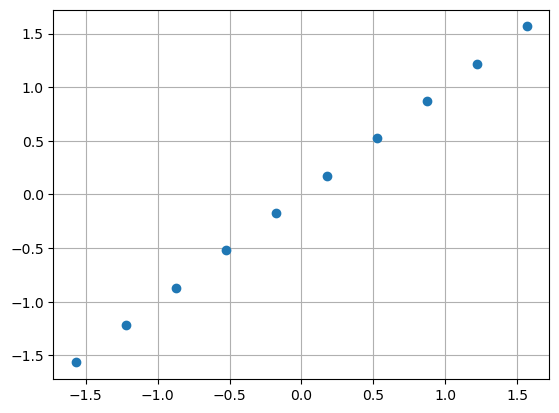

In [5]:
# Graficar los datos
plt.scatter(x=X, y=y, zorder=2)
plt.grid(True, zorder=0)
plt.show()

In [ ]:
model = keras.Sequential()

model.add(keras.Input(shape=(1,)))
# Capa de salida con activación lineal para regresión
model.add(keras.layers.Dense(1, activation='linear'))

# Reducir el learning rate para un entrenamiento más estable con más capas
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

In [36]:
print('Comenzando entrenamiento...')
historial = model.fit(X, y, epochs=500, verbose=False)
print('Entrenamiento finalizado')

Comenzando entrenamiento...
Entrenamiento finalizado


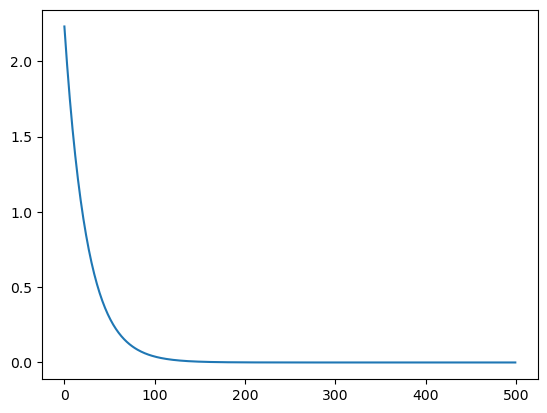

In [37]:
plt.plot(historial.history['loss']);

In [38]:
# Obtener los parametros del modelo
model.get_weights()

[array([[0.9999386]], dtype=float32), array([1.0221313e-09], dtype=float32)]

In [49]:
# Realizar una predicción
celsius_a_predecir = 43

# Convertir el valor a estandarizado
celsius_a_predecir_std = scaler_x.transform([[celsius_a_predecir]])

In [50]:
# Predecir el valor de Fahrenheit
fahrenheit_predicho_std = model.predict(celsius_a_predecir_std)
print(f"Valores estandarizados: {celsius_a_predecir_std[0][0]:.2f}°C son {fahrenheit_predicho_std[0][0]:.2f}°F")

fahrenheit_predicho = scaler_y.inverse_transform(fahrenheit_predicho_std)
print(f"Valores reales: {celsius_a_predecir}°C son {fahrenheit_predicho[0][0]:.2f}°F")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Valores estandarizados: 2.12°C son 2.12°F
Valores reales: 43°C son 109.40°F
